In [179]:
import re
import os
import pandas as pd
import bz2
from elasticsearch import helpers
from elasticsearch import Elasticsearch

# Opening file method

In [2]:
def open_file(path):
    file = bz2.open(os.path.expanduser(path))
    return file

# Data extraction method

In [22]:
def extract_data(data,output):
    #alternate_name
    #alternate_names
    #aka
    #also known as
    #other_name
    #other_names
    #alias
    #altname
    #altnames
    #alt_name
    #alt_names

    regex1 = r'(<title>(.*?)</title>)'
    regex2 = '(\|\s*(alternate_names?|aka|also known as|other_names?|othernames?|alias|altnames?|alt_names?)\s*= *([^\n]*))'


    title = ""
    temp = ""
    alt = ""
    infoboxes = ["{{infboox", "{{Infobox", "{{ Infobox", "{{ infobox"]
    count_title = 0
    count_infobox = 0
    a = 0
    b = 0

    
    line = data.readline().decode("utf-8")
    with open(output, 'w') as f:
        while line:
            reg = re.search(regex1 + '|' + regex2, line)
            if reg:
                if reg.group()[0] == "<":
                    title = reg.group(2)
                    count_title = count_title + 1
            elif any(x in line for x in infoboxes):
                
                while line:

                    if "</page>" in line or "<page>" in line or line.startswith("}}") or line.startswith(" }}"):
                        if title:
                            count_infobox = count_infobox + 1
                            print("title: " + title, file = f)
                            print("alternative: " + alt, file = f)
                            print("------------",file = f)
                            alt = ""
                            title = ""
                            temp = ""
                            a = 0
                            b = 0
                        break
                            
                    reg2 = re.search(regex1 + '|' + regex2, line)
                    if reg2:
                       
                        if reg2.group(5) != None:
                            temp = reg2.group(5)
                            if "{{" in temp:
                                c = 0            
                                while line:
                                    c = c + 1
                                    if c == 10:
                                        break
                                    a = temp.count("{{")
                                    b = temp.count("}}")
                                    if a == b:
                                        break
                                    line = data.readline().decode("utf-8")
                                    temp = temp + line 
                                    temp = temp.strip()
                                    
                                
                                alt = temp
                                if alt.startswith("*"):
                                    alt = alt[1:]              
    

                            else:
                                alt = temp
                                if alt.startswith("*"):
                                    alt = alt[1:]

                    line = data.readline().decode("utf-8")
                    

            line = data.readline().decode("utf-8")      
                
    print("Number of titles: ", count_title)
    print("Number of infoboxes: ", count_infobox)
                     

# Data cleaning method

In [303]:
def clear_data(path,path_clear):
    
    
    
    with open(path) as out, open(path_clear, 'w') as clear:
        for line in out:
            list_capitals = []
            if line.startswith("title:"):
                
                line = re.sub(r"&amp;", "&", line)
                line = re.sub(r"&ndash;", "-",line)
                line = re.sub(r"&quot;", "\"",line)
                
                clear.write(line)
            elif line.startswith("alternative:"):
                
                line = re.sub(r"&amp;", "&", line)
                
                line = re.sub(r"{{[Cc]itation(.*?)}}", "",line)
                
                line = re.sub(r"{{[Cc]ite(.*?)}}", "",line)
                
                line = re.sub(r"\| ?id ?=(.*)", "",line)
                
                line = re.sub(r",? ?native_name=(.*)", "",line)
                
                line = re.sub(r"&lt(.*?)&gt;", ",", line)
                
                line = re.sub(r"{{Braille cell(.*?)}}", "", line)
                
                line = re.sub(r"&quot;", "\"",line)
                
                line = re.sub(r"'*", "",line)
                
                line = re.sub(r"{{[Ll]ang.*?\|.*?\|(.*?)}}", r"\1", line)
                
                line = re.sub(r"{{[Ll]ang.*?\|(.*?)}}", r"\1", line)
                
                line = re.sub(r"\[\[.*\|(.*?)\]\]",r"\1",line)
                
                line = re.sub(r"\[\[(.*?)\]\]",r"\1",line)
                
                line = re.sub(r"{{\·}}",",", line)
                
                line = re.sub(r"{{mp\|(.*?)(?:}}|\|.*?}})",r"\1",line)
   
                line = re.sub(r"&ndash;", "-",line)
                
                line = re.sub(r"\[http(.*?)\]", "",line)
            
                line = re.sub(r"{{[Pp]ad top italic ?\|(.*?)}}",r"\1",line)
                
                line = re.sub(r"{{[Ss]mall.*\|(.*?)}}",r"\1",line)
                
                line = re.sub(r"{{[Ss]mall.*","",line)
                
                line = re.sub(r"{{[Nn]ative.*\|.*\|(.*?)}}",r"\1",line)
            
                line = re.sub(r"&lt;.*","",line)
            
                line = re.sub(r"See note.*","",line)
                
                line = re.sub(r"{{[Oo]kina}}","\'",line)
                
                line = re.sub(r"{{[Nn]o ?wrap.*\|(.*?)}}",r"\1",line)
                
                line = re.sub(r"{{[Nn]owrap.*","",line)
                
                line = re.sub(r"{{[Nn]o ?bold.*\|(.*?)}}",r"\1",line)
                
                line = re.sub(r"{{[Nn]obold.*","",line)
                
                line = re.sub(r"{{[Ii]talic correction.*\|(.*?)}}",r"\1",line)
                
                line = re.sub(r"{{[Nn]o ?italic.*\|(.*?)}}",r"\1",line)
                
                line = re.sub(r"{{ ?[Ff]lat ?list ?|(.*?)}}", r"\1", line)
                
                line = re.sub(r"{{ ?[Ff]lat ?list ?|", "", line)
                
                line = re.sub(r"{{ ?[Pp]lain ?list ?|(.*?)}}", r"\1", line)
                
                line = re.sub(r"{{ ?[Hh]list ?|(.*?)}}", r"\1", line)
                
                line = re.sub(r"{{startplainlist.*", "", line)
                
                line = re.sub(r"{{ ?[Uu]nbulleted ?list ?|", "", line)
                
                line = re.sub(r"{{ ?[Bb]ulleted ?list ?|", "", line)
                
                line = re.sub(r"{{ublist|class=nowrap |", "", line)
                
                line = re.sub(r"{{ ?[Uu]blist ?|", "", line)
                
                line = re.sub(r"{{bulleted_list , ", "", line)
                
                line = re.sub(r"{{[Ww]ebarchive.*", "", line)
                
                line = re.sub(r"mi2=.*", "", line)
                
                line = re.sub(r"{{ ?[Uu]bl ?|", "", line)
                
                line = re.sub(r"\*",",",line)
                
                line = re.sub(r"\|",",",line)
                
                line = re.sub(r"{{zh ?,", "", line)
                
                line = re.sub(r"s2? ?=", "", line)
                
                line = re.sub(r"t2? ?=", "", line)
                
                line = re.sub(r"p2? ?=", "", line)
                
                line = re.sub(r"w2? ?=", "", line)
                
                line = re.sub(r"l2? ?=", "", line)
                
                line = re.sub(r"{{iafd name", "", line)
                
                line = re.sub(r"{{[Cc]ollapsible list ? ?,?", "", line)
                
                line = re.sub(r"{{csv,", "", line)
                
                line = re.sub(r"{{-", ",", line)
                
                line = re.sub(r"{{[Nn]ihongo4?,?", "", line)
                
                line = re.sub(r"{{lower,?", "", line)
                
                line = re.sub(r"0.2em,?", "", line)
                
                line = re.sub(r"{{r,?", "", line)
                
                line = re.sub(r"{{transl ?,.. ?,", "", line)

                line = re.sub(r"hr ?=", "",line)
                
                line = re.sub(r"hanja ?=", "",line)
                
                line = re.sub(r"rr ?=", "",line)
                
                line = re.sub(r"tl ?=", "",line)
                
                line = re.sub(r"c2? ?=", "",line)
                
                line = re.sub(r"hangul ?=", "",line)
              
                line = re.sub(r"{{[Hh]ebrew ?,", "",line)
                
                line = re.sub(r"{{in lang, ?.. ?,", "",line)
                
                line = re.sub(r"&nbsp;", ",",line)
                
                line = re.sub(r"--&gt;", "",line)
                       
                line = re.sub(r"\t", "",line)
                
                line = re.sub(r"&gt;", ",",line)
                
                line = re.sub(r" +", " ",line)
                
                line = re.sub(r"{{[Ss]fn.*", "", line)
                
                line = re.sub(r"{{{NOC.*", "", line)
                
                line = re.sub(r"Brailsford,2017,loGaelic", "", line)
                
                line = re.sub(r"{{Infobox.*", "", line)
                
                line = re.sub(r"{{[Ll]inktext.*", "", line)
                
                line = re.sub(r"Günümüzde.*", "", line)
                
                line = re.sub(r"/English Station Index", "", line)
                
                line = re.sub(r"hr", "", line)
                
                line = re.sub(r"pr", "",line)
                
                line = re.sub(r"de", "",line)
                
                line = re.sub(r"ma", "",line)
                
                line = re.sub(r"(.*?)\s*=\s*(.*?)", "", line)
                
                line = re.sub(r";", ",", line) 
                
                line = re.sub(r"italino", "", line)
                
                line = re.sub(r" p. ", "", line)
                
                line = re.sub(r"Morris.*", "", line)
                
                line = re.sub(r"\}", ",", line) 
                
                line = re.sub(r"none", "", line)
                
                line = re.sub(r"Courtesy name", "",line)
                
                line = re.sub(r"labelno\)", "",line)
                
                line = re.sub(r"Birth name", "",line)
                 
                line = re.sub(r"{{{other_names", "",line)
                
                line = re.sub(r"Abbreviation", "",line)
                
                line = re.sub(r"arrondissement", "",line)
                
                line = re.sub(r"{{.*", "",line)
           
                line = re.sub(r"((,){2,})", ",",line)
                
                line = re.sub(r",\n", "\n",line)
                
                line = re.sub(r", ,",",",line)
                
 
                                
                clear.write(line)
            else:
                
                clear.write("-----------\n")

# Statistics and visualizations

In [23]:
data = open_file("~/Desktop/enwiki-latest-pages-articles27.xml-p65475910p65901407.bz2")
extract_data(data,'data/data_small.txt')

Number of titles:  145634
Number of infoboxes:  24303


In [24]:
medium_data = open_file("~/Desktop/enwiki-latest-pages-articles10.xml-p4045403p5399366.bz2")
extract_data(medium_data,'data/data_medium.txt')

Number of titles:  453408
Number of infoboxes:  96621


In [25]:
big_data = open_file("~/Desktop/enwiki-latest-pages-articles.xml.bz2")
extract_data(big_data,'data/data_big.txt')

Number of titles:  20707605
Number of infoboxes:  3640479


In [490]:
clear_data('data/data_medium.txt','data/data_medium_clear.txt')

In [304]:
clear_data('data/data_big.txt','data/data_big_clear.txt')

In [379]:
file = open('data/data_big_clear.txt', encoding ="utf-8")
text = file.readlines()

In [385]:
my_dict = {}
x = []
sum_of =0
for i in text:
    if i.startswith('title'):
        t = i
        t = re.sub(r"title:", "",t)
        t = re.sub(r"\n","",t)
    if i.startswith('alternative'):
        t2 = i
        t2 = re.sub(r"alternative:","",t2)
        t2 = re.sub(r"\n","",t2)
        x = t2.split(",")
        if " " in x:
            x.remove(" ")
        number = len(x)
    my_dict[t] = len(x)
    
number = 0
total_sum = 0
maximum = 0
slovo = ""
for key in my_dict:
    total_sum = total_sum + my_dict[key]
    number = number + 1
    if my_dict[key] > maximum:
        maximum = my_dict[key]
        slovo = key
    if my_dict[key] > 0:
        sum_of = sum_of + 1

        
print("Average number of alternate names is: ", total_sum / number)
print("Max number of alternate names is: ", maximum)
print(slovo) 
print("Number of infoboxes cointaing alternative name: ",sum_of)

Average number of alternate names is:  0.04171786185279465
Max number of alternate names is:  32
 It (character)
Number of infoboxes cointaing alternative name:  100964


In [388]:
sorted_dict_1 = {}
sorted_keys_1 = sorted(my_dict, key=my_dict.get, reverse = True)

for w in sorted_keys_1:
    sorted_dict_1[w] = my_dict[w]

In [417]:
print(list(sorted_dict_1.items())[:10])

[(' It (character)', 32), (' John Reese (Person of Interest)', 32), (' Harold Finch (Person of Interest)', 28), (' Johann Otto Hoch', 27), (' Choky Ice', 27), (' John Holmes (actor)', 25), (' The Prophet (musician)', 25), (' Technoboy', 25), (' Oliver Lieb', 24), (' Harry Reems', 24)]


In [383]:
import statistics
list_stat = []

for key in sorted_dict_1:
    list_stat.append(sorted_dict_1[key])

print("Medián hodnôt je: ",statistics.median(list_stat))

Medián hodnôt je:  0


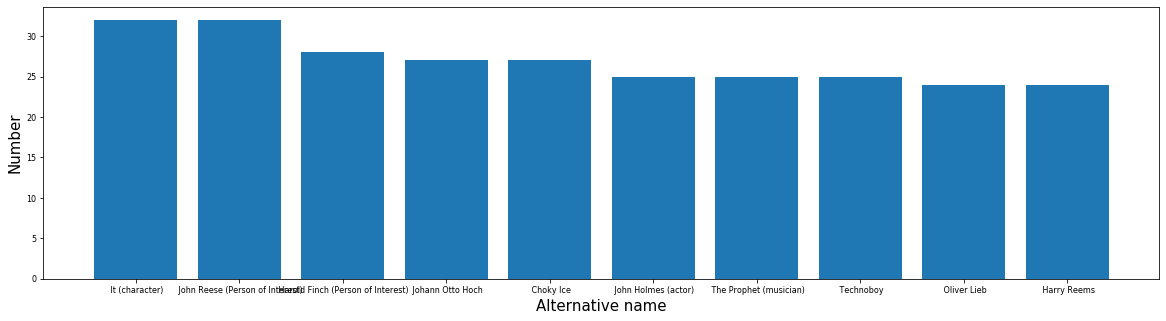

In [392]:
import matplotlib.pyplot as plt
import collections

z = list(sorted_dict_1.keys())
z = z[:10]
z1 = list(sorted_dict_1.values())
z1 = z1[:10]
plt.figure(figsize=[20,5])
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('Alternative name',fontsize=15)
plt.ylabel('Number',fontsize=15)
plt.bar(z, z1)
plt.show()

In [331]:
my_dict_2 = {}
maximum = 0
slovo = ""

for i in text:
    if i.startswith('title'):
        t = i
        t = re.sub(r"title:", "",t)
        t = re.sub(r"\n","",t)
    if i.startswith('alternative'):
        t2 = i
        t2 = re.sub(r"alternative:","",t2)
        t2 = re.sub(r"\n","",t2)
        x = t2.split(",")
        #number_2 = len(x)
        
        for k in x:
            if k not in my_dict_2.keys():
                my_dict_2[k] = 1
            else:
                my_dict_2[k] = my_dict_2[k] + 1

for key in my_dict_2:
    if my_dict_2[key] > maximum:
        if key != " " and key != " 2004" and key != " Jr." and key != "Morris" and key != " none" and key != " etc." and key != "1" and key != "e" :
            maximum = my_dict_2[key]
            slovo = key

print("most popular aka: ", slovo)
print("number of word: ", maximum)                

most popular aka:   Main Street
number of word:  20


In [332]:
sorted_dict = {}
sorted_keys = sorted(my_dict_2, key=my_dict_2.get, reverse = True)

for w in sorted_keys:
    sorted_dict[w] = my_dict_2[w]

In [333]:
print(list(sorted_dict.items())[:10])

[(' ', 3542810), (' Jr.', 28), (' etc.', 23), ('e', 20), (' Main Street', 20), (' Mike', 16), ('1', 16), (' 2', 16), (' The Beast', 15), (' Tony', 15)]


In [334]:
del sorted_dict[" "]

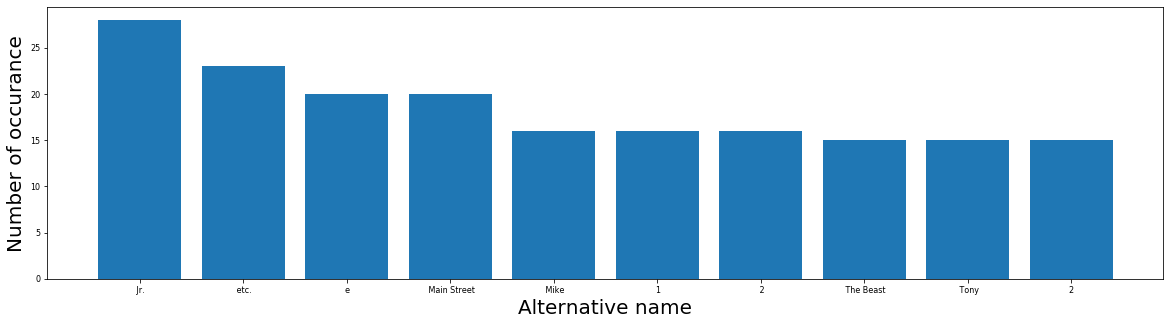

In [488]:
import matplotlib.pyplot as plt
import collections


no = list(sorted_dict.keys())
no = no[:10]
no1 = list(sorted_dict.values())
no1 = no1[:10]
plt.figure(figsize=[20,5])
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('Alternative name',fontsize=20)
plt.ylabel('Number of occurance',fontsize=20)
plt.bar(no, no1)
plt.show()

# Methods for indexing and searching

In [341]:
es = Elasticsearch()


In [342]:
es.info()

{'name': 'MBPuzivelaLaura',
 'cluster_name': 'elasticsearch_lobbova16',
 'cluster_uuid': 'j8vcIdscRzOhg31JTs8qBQ',
 'version': {'number': '7.10.0',
  'build_flavor': 'default',
  'build_type': 'tar',
  'build_hash': '51e9d6f22758d0374a0f3f5c6e8f3a7997850f96',
  'build_date': '2020-11-09T21:30:33.964949Z',
  'build_snapshot': False,
  'lucene_version': '8.7.0',
  'minimum_wire_compatibility_version': '6.8.0',
  'minimum_index_compatibility_version': '6.0.0-beta1'},
 'tagline': 'You Know, for Search'}

In [343]:
es.indices.get_alias("*")

{'alt': {'aliases': {}}, 'ix': {'aliases': {}}, 'alternate': {'aliases': {}}}

In [344]:
file = open('data/data_big_clear.txt', encoding ="utf-8")

In [345]:
text = file.readlines()

In [346]:
es.indices.delete(index='ix')

{'acknowledged': True}

In [348]:
count = 1
alt_list = []
t = ""
t2 = ""
for i in text:
    if i.startswith('title'):
        t = i
        t = re.sub(r"title:", "",t)
    if i.startswith('alternative'):
        t2 = i
        t2 = re.sub(r"alternative:","",t2)
    
        actions = {
            "_index": "ix",
            "_type": "doc",
            "_id": count,
            "_source": {
                "title": t,
                "alternative": t2 }
          }  
        alt_list.append(actions)
        count = count + 1

helpers.bulk(es, alt_list)


//anaconda3/lib/python3.7/site-packages/elasticsearch/connection/base.py:190: ElasticsearchDeprecationWarning: [types removal] Specifying types in bulk requests is deprecated.
  warnings.warn(message, category=ElasticsearchDeprecationWarning)


(3639903, [])

In [460]:
def find_in_titles(word):
    body = {
        "from":0,
        "track_total_hits": True,
        "size": 7,
        "query": {
            "match": {
                "title":word
            }
        }
    }

    res = es.search(index="ix",body=body)
    if res['hits']['total']['value'] > 7:
            print("Too many results. Just first 7 are shown. Be more specific.")
            print("...")
    for hit in res['hits']['hits']:
        print ("Title: ", hit['_source']['title']) 
        
        if hit['_source']['alternative'] == " \n":
            print("-- No alternative name --")
        else:
            print ("Alternative: ", hit['_source']['alternative'])
        #print (hit['_score'])
        print ('**********************')


In [461]:
def find_in_alternate(word):
    body = {
        "from":0,
        "track_total_hits": True,
        "size": 7,
        "query": {
            "match": {
                "alternative":word
            }
        }
    }

    res = es.search(index="ix",body=body)
    
    if res['hits']['total']['value'] > 7:
            print("Too many results. Just first 7 are shown. Be more specific.")
            print("...")
    for hit in res['hits']['hits']:
        print ("Title: ",hit['_source']['title']) 
        print ("Alternative: ",hit['_source']['alternative'])
        #print (hit['_score'])
        print ('**********************')

# Searching the titles

To search for the titles, you need to write in this cell between apostrophes the title you are searching for. 

In [487]:
want_to_find_title = "Sauron"
find_in_titles(want_to_find_title)

Title:   Sauron

Alternative:   Dark Lord, Necroncer

**********************
Title:   Sauron (comics)

-- No alternative name --
**********************


# Searching the alternative names

To search for the alternative names, you need to write in this cell between apostrophes the alternate name you are searching for. 

In [471]:
want_to_find_alternate = "Dark Lord" 
find_in_alternate(want_to_find_alternate)

Too many results. Just first 7 are shown. Be more specific.
...
Title:   Sauron

Alternative:   Dark Lord, Necroncer

**********************
Title:   Michał Oleksiejczuk

Alternative:   Lord

**********************
Title:   Kevin Poulsen

Alternative:   Dark Dante

**********************
Title:   Dark New Day

Alternative:   Dark Blue

**********************
Title:   Kaline Medeiros

Alternative:   Dark Angel

**********************
Title:   DJ Lord

Alternative:   DJ Lord, Mista Lord

**********************
Title:   Dungeon synth

Alternative:   Dark Medieval, Medieval Dark Ambient, Dark Dungeon Music, Black Ambient

**********************


------------------